TOPIC: Understanding Pooling and Padding in CNN

1.Describe the purpose and benefits of pooling in CNN

Purpose of Pooling in CNN

Pooling layers in Convolutional Neural Networks (CNNs) serve several essential functions:

Dimensionality Reduction: Pooling reduces the spatial dimensions (width and height) of feature maps generated by convolutional layers.

Feature Extraction and Selection: By consolidating information, pooling layers help the network focus on the most important features, discarding less relevant details.

Benefits of Pooling in CNN

Improved Computational Efficiency: Fewer parameters and reduced feature map sizes decrease the computational load, accelerating both training and inference.

Robustness to Variations: The network becomes less sensitive to small changes, noise, or distortions in the input, making it more reliable in real-world scenarios.

2.Explain the difference between min pooling and max pooling

Difference Between Min Pooling and Max Pooling

Definition and Operation

Max Pooling selects the maximum value from each patch (window) of the feature map as it slides across the input.

This operation retains the most prominent or strongest features within each region, helping the model focus on the most significant activations.

Min Pooling selects the minimum value from each patch of the feature map.

This operation retains the least prominent or weakest features in each region, which can be useful for specific tasks but is less commonly used in practice.

3.Discuss the concept of padding in CNN and its significance.

Concept of Padding in CNN

Padding in Convolutional Neural Networks (CNNs) refers to the process of adding extra pixels-typically zeros-around the border of the input data before applying convolution operations.

Significance of Padding

Preserves Spatial Dimensions: Padding allows the output feature map to maintain the same width and height as the input, especially when using "same" padding.

4.Compare and contrast zero-padding and valid-padding in terms of their effects on the output feature map size.

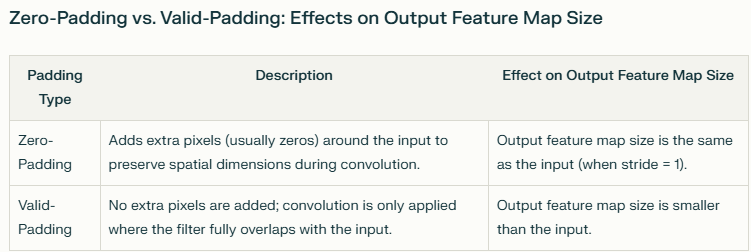

TOPIC: Exploring LeNet

1.Provide a brief overview of LeNet-5 architecture.

LeNet-5 is a pioneering convolutional neural network (CNN) architecture introduced by Yann LeCun and colleagues in 1998, primarily designed for handwritten digit recognition tasks such as those found in the MNIST dataset. Its design established many foundational principles used in modern deep learning.

Key Features:

Processes 32×32 grayscale images as input.

Employs convolutional, pooling (subsampling), and fully connected layers.

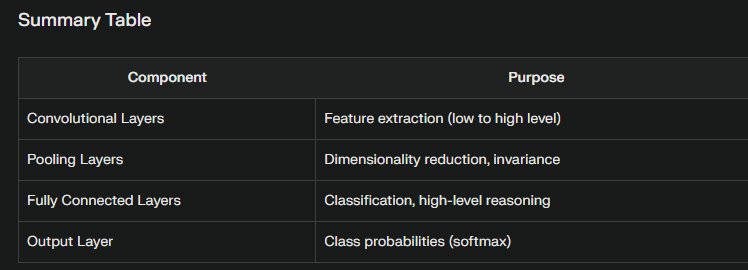

2 Describe the key components of LeNet-5 and their respective purposes.

Key Components of LeNet-5 and Their Purposes

LeNet-5 is structured as a sequence of layers, each with a specific function that contributes to the network’s ability to extract features and perform classification, especially for handwritten digit recognition.

1.Input Layer

Purpose: Receives the input image, typically normalized to 32×32 pixels. This layer does not have trainable parameters and serves as the entry point for data.

2.Convolutional Layers (C1, C2, C3)

Purpose: Extract spatial features from the input image by applying learnable filters (kernels). Each convolutional layer detects increasingly complex patterns, from edges in early layers to more abstract features in deeper layers.

3.Pooling (Subsampling) Layers (S2, S4)

Purpose: Reduce the spatial dimensions of feature maps, lowering computational complexity and introducing translation invariance.

4.Flattening Layer

Purpose: Converts the multidimensional output from the final convolutional or pooling layer into a one-dimensional vector.

5.Fully Connected Layers (F5, F6)

Purpose: Perform high-level reasoning and classification based on the features extracted by previous layers.

6. Output Layer

Purpose: Produces the final classification result. For digit recognition, this layer has 10 neurons (one for each digit 0–9) and uses a softmax activation function to output class probabilities.

3.Discuss the advantages and limitations of LeNet-5 in the context of image classification tasks

Advantages of LeNet-5 in Image Classification

Pioneering Architecture

LeNet-5 was one of the first convolutional neural networks (CNNs) to demonstrate the power of deep learning for image classification, particularly in handwritten digit recognition tasks (e.g., MNIST dataset).

It introduced key concepts such as convolutional layers and subsampling (pooling) layers, enabling automatic hierarchical feature extraction from images without manual engineering.

Simplicity and Efficiency

The architecture is computationally lightweight, consisting of only seven layers (including convolutional, pooling, and fully connected layers), making it suitable for early hardware and embedded systems.

Real-World Applications

Successfully used in digit recognition tasks, such as postal code and bank check processing, and small-scale image classification where data and computational resources are limited.

Limitations of LeNet-5

Restricted Input and Data Flexibility

LeNet-5 was designed for fixed-size, 32x32 grayscale images.

Limited Depth and Feature Extraction

The network has only two convolutional layers, restricting its capacity to learn complex, hierarchical features from images.

4.Implement LeNet-5 using a deep learning framework of your choice (e.g., TensorFlow, PyTorch) and train it on a publicly available dataset (e.g., MNIST). Evaluate its performance and provide insights.

In [ ]:
from torch.utils.data import Subset
import numpy as np

subset_indices = np.random.choice(len(train_dataset), size=int(0.1 * len(train_dataset)), replace=False)
small_train_dataset = Subset(train_dataset, subset_indices)
small_train_loader = DataLoader(small_train_dataset, batch_size=64, shuffle=True)

NameError: name 'train_dataset' is not defined

In [ ]:
#Reduce Model Capacity
#Make the model shallower or use fewer filters/neurons.
class SmallLeNet(nn.Module):
    def __init__(self):
        super(SmallLeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, kernel_size=5)   # fewer filters
        self.pool = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(3, 6, kernel_size=5)   # fewer filters
        self.fc1 = nn.Linear(6 * 5 * 5, 30)           # fewer neurons
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)
    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = self.pool(x)
        x = F.tanh(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 6 * 5 * 5)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
#limit training to 2 epochs
num_epochs = 2

In [ ]:
#increase regularization
# Apply dropout after each fully connected layer in forward()
self.dropout = nn.Dropout(p=0.5)

In [ ]:
#increase learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

TOPIC: Analyzing AlexNet

1.Present an overview of the AlexNet architecture

AlexNet achieved a significant breakthrough in image classification by winning the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) with a top-5 error rate of 15.3%, a substantial improvement over previous methods.

2.Explain the architectural innovations introduced in AlexNet that contributed to its breakthrough performance.

1.Deep Convolutional Architecture

AlexNet was significantly deeper than prior models, featuring eight layers (five convolutional and three fully connected), enabling the extraction of complex hierarchical features from images.

2.ReLU Activation Function

The use of the Rectified Linear Unit (ReLU) activation function, instead of traditional sigmoid or tanh activations, allowed for much faster training and helped mitigate the vanishing gradient problem.

3.Discuss the role of convolutional layers, pooling layers, and fully connected layers in AlexNet

Role of Convolutional Layers, Pooling Layers, and Fully Connected Layers in AlexNet

Convolutional Layers

AlexNet features five convolutional layers, which are responsible for extracting hierarchical features from the input images.

Pooling Layers

Pooling layers, specifically max pooling in AlexNet, follow certain convolutional layers (after the 1st, 2nd, and 5th convolutional layers).

Fully Connected Layers

The output from the final pooling layer is flattened into a one-dimensional vector and passed to three fully connected (dense) layers.

4.Implement AlexNet using a deep learning framework of your choice and evaluate its performance on a dataset of your choice

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 4 * 4)
        x = self.classifier(x)
        return x